<a href="https://colab.research.google.com/github/Malliraochintha/Anomaly-detection-in-iot-networks-using-tinyML-Models/blob/main/Anomaly_detection_in_iot_networks_using_tinyML__Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---
---

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/KDDTest+.txt'  # change to your file location
df = pd.read_csv(file_path, delimiter=',', header=None)

In [ ]:
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
10695,0,tcp,ftp_data,SF,12,0,0,0,0,0,...,1.00,0.00,1.00,0.29,0.00,0.00,0.00,0.00,warezmaster,17
1475,281,tcp,ftp,SF,158,593,0,0,0,2,...,0.37,0.03,0.00,0.00,0.00,0.00,0.00,0.00,warezmaster,13
11461,0,tcp,http,SF,189,33179,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
3384,0,tcp,http,S0,0,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.63,0.63,0.34,0.34,apache2,18
9151,4,tcp,pop_3,SF,28,93,0,0,0,0,...,0.94,0.04,0.02,0.04,0.00,0.00,0.00,0.00,guess_passwd,7


In [ ]:
df.shape

(22544, 43)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       22544 non-null  int64  
 1   1       22544 non-null  object 
 2   2       22544 non-null  object 
 3   3       22544 non-null  object 
 4   4       22544 non-null  int64  
 5   5       22544 non-null  int64  
 6   6       22544 non-null  int64  
 7   7       22544 non-null  int64  
 8   8       22544 non-null  int64  
 9   9       22544 non-null  int64  
 10  10      22544 non-null  int64  
 11  11      22544 non-null  int64  
 12  12      22544 non-null  int64  
 13  13      22544 non-null  int64  
 14  14      22544 non-null  int64  
 15  15      22544 non-null  int64  
 16  16      22544 non-null  int64  
 17  17      22544 non-null  int64  
 18  18      22544 non-null  int64  
 19  19      22544 non-null  int64  
 20  20      22544 non-null  int64  
 21  21      22544 non-null  int64  
 22

In [ ]:
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
                'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
                'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
                'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'unknown_feature',
                'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
                'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
                'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
                'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
                'dst_host_rerror_rate', 'neptune', 'target']

In [ ]:
df.columns = column_names

In [ ]:
df.sample(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,neptune,target
982,0,tcp,telnet,S3,0,44,0,0,0,0,...,0.44,0.50,0.00,0.00,0.34,0.77,0.49,0.0,processtable,19
17729,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.00,0.07,0.00,0.00,0.00,0.00,1.00,1.0,neptune,19
7950,0,tcp,http,SF,295,278,0,0,0,0,...,1.00,0.00,0.01,0.02,0.00,0.00,0.00,0.0,normal,21
1887,282,tcp,ftp,SF,158,595,0,0,0,2,...,0.38,0.05,0.01,0.00,0.00,0.00,0.00,0.0,warezmaster,11
19944,0,tcp,http,SF,214,5540,0,0,0,0,...,1.00,0.00,0.04,0.05,0.00,0.00,0.00,0.0,normal,21


In [ ]:
categorical_cols = ['protocol_type', 'service', 'flag', 'neptune']
df2 = pd.get_dummies(df, columns=categorical_cols)

In [ ]:
numeric_cols = ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'serror_rate',
                 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
                 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
                 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
                 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df2[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
# Assume 21 represents normal (benign) traffic, and other values (e.g., 15, 11) represent different attacks

df2['target'] = df['target'].apply(lambda x: 1 if x != 21 else 0)
# 1 for attacks, 0 for normal

## | Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df2.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,target
count,22544.000000,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,0.003792,1.654651e-04,0.001528,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,0.551963,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,0.525639
std,0.024381,7.525373e-03,0.015766,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,0.438369,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,0.499353
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.058824,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,8.595216e-07,0.000034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.658824,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,4.568198e-06,0.000447,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,1.000000
max,1.000000,1.000000e+00,1.000000,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df2['target'].value_counts()

,count
target,
1,11850
0,10694


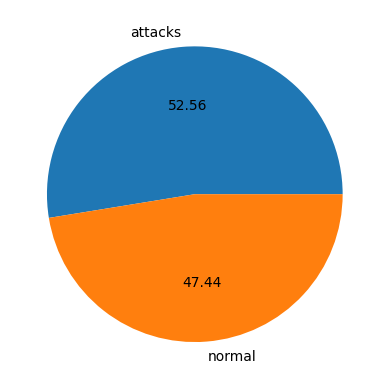

In [ ]:
plt.pie(df2['target'].value_counts(), labels=['attacks','normal'],autopct="%0.2f")
plt.show()

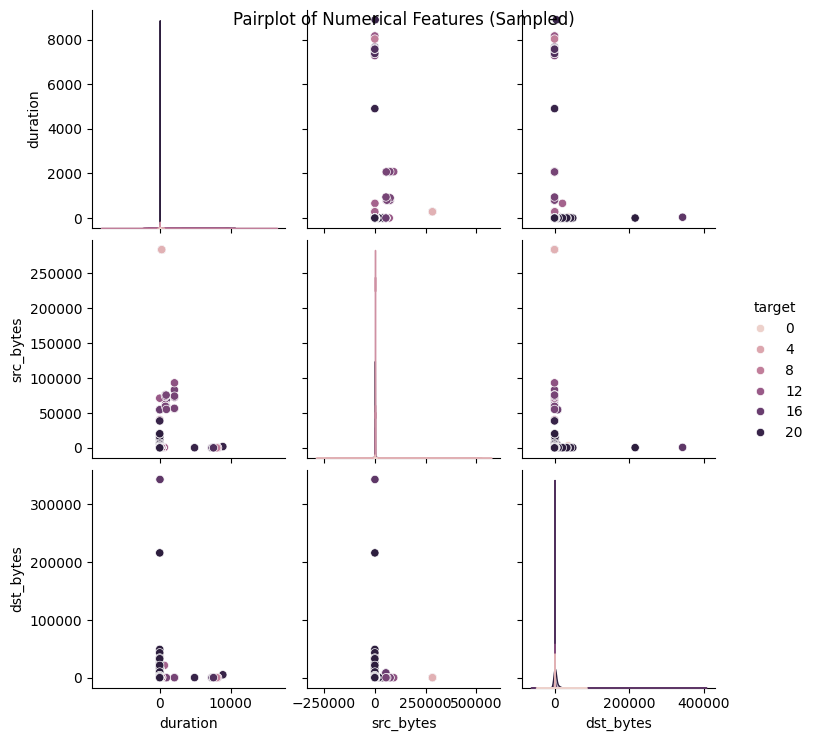

In [ ]:
sns.pairplot(df.sample(1000), vars=numeric_cols[:3], hue='target')
plt.suptitle('Pairplot of Numerical Features (Sampled)')
plt.show()

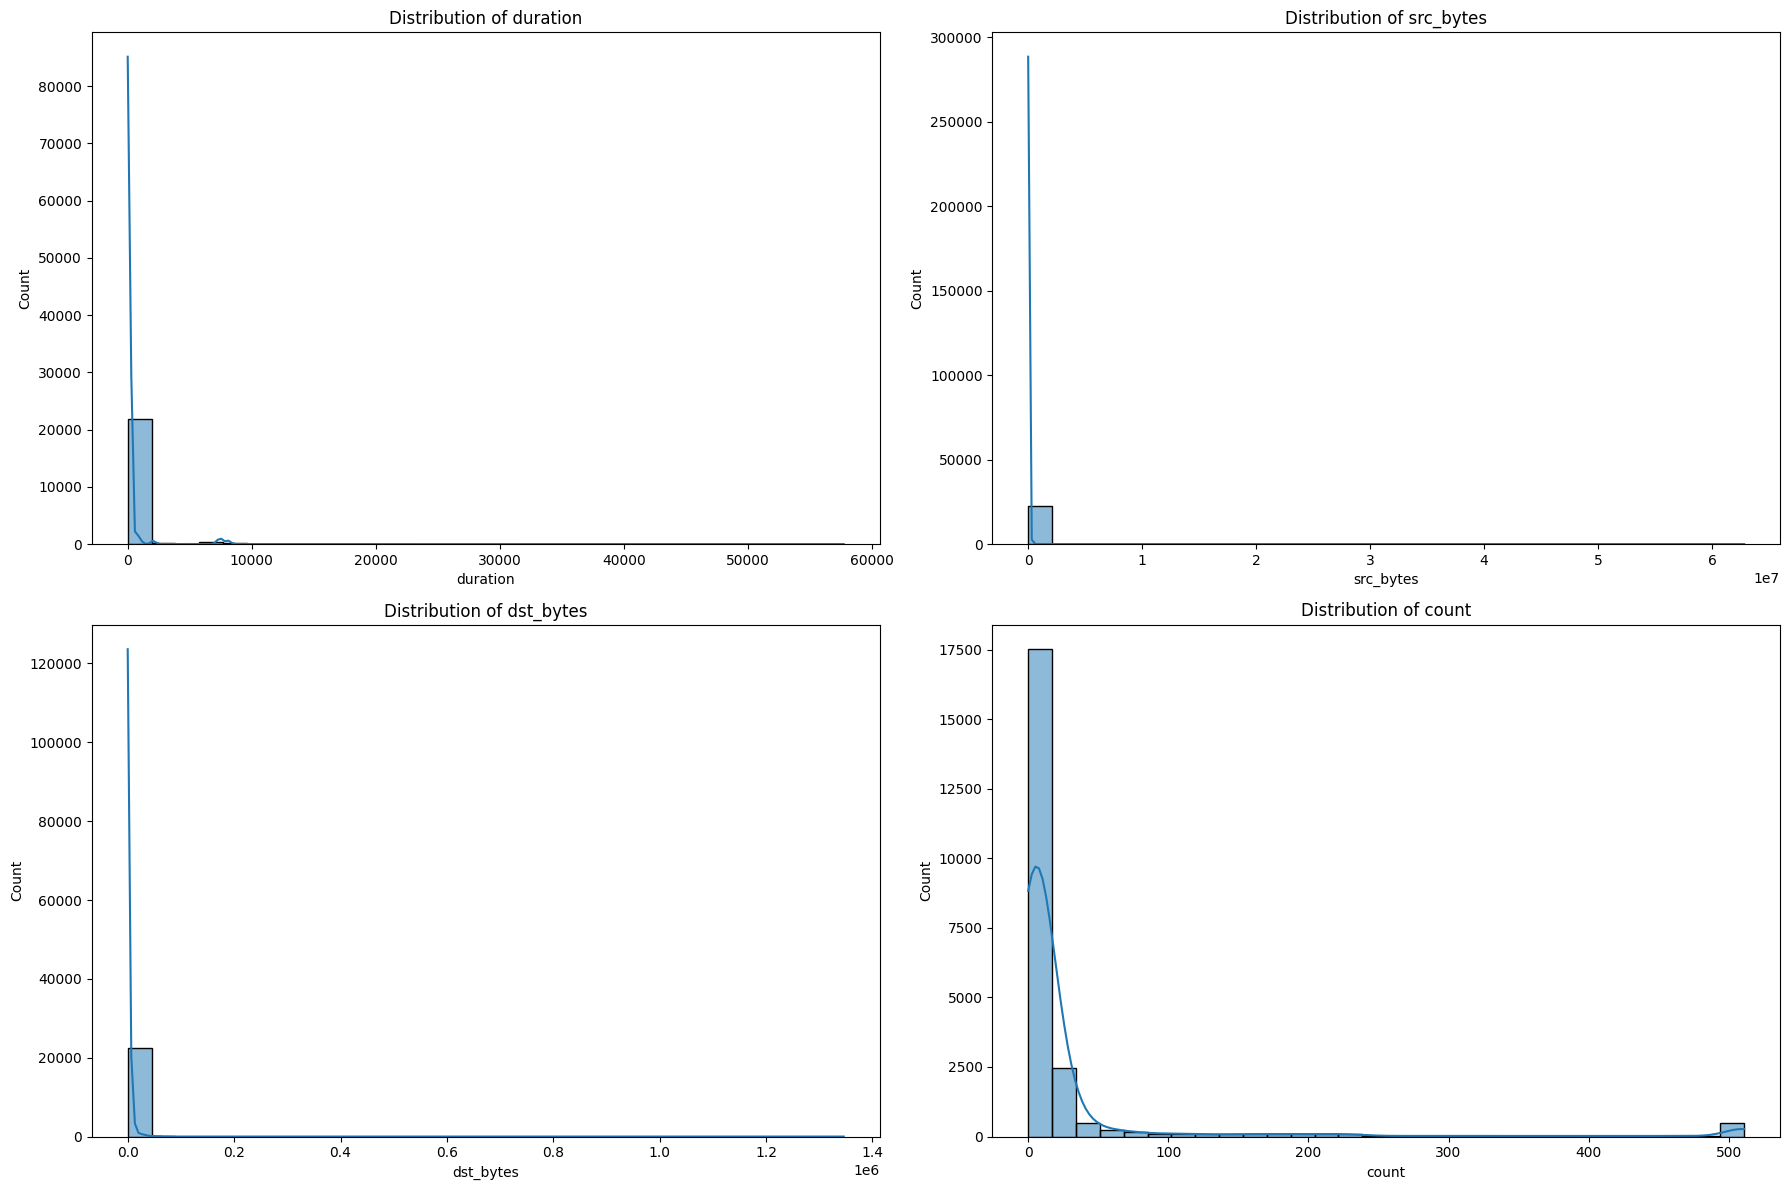

In [ ]:
# Distribution of numerical features

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols[:4]):  # Displaying the first 4 numerical features
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

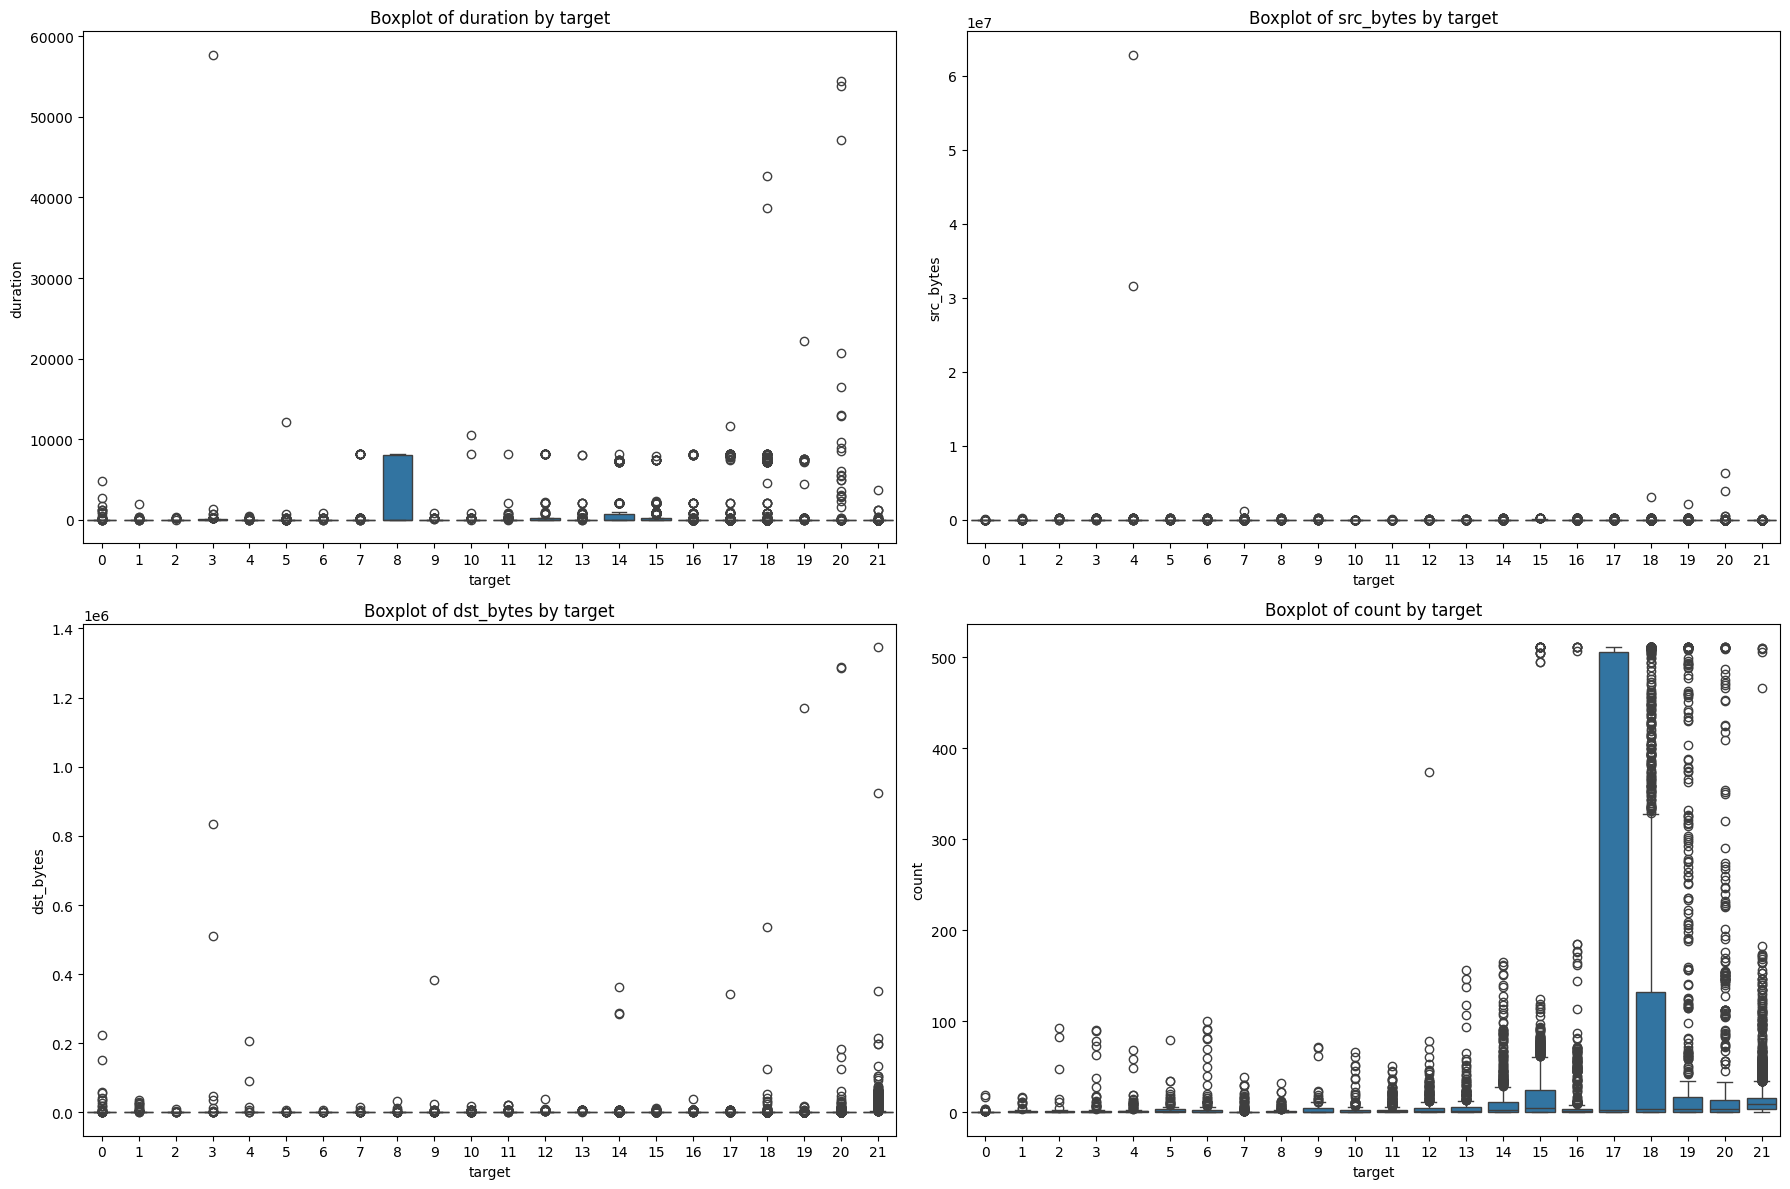

In [ ]:
# Boxplots for numerical features by target

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols[:4]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'Boxplot of {col} by target')
plt.tight_layout()
plt.show()

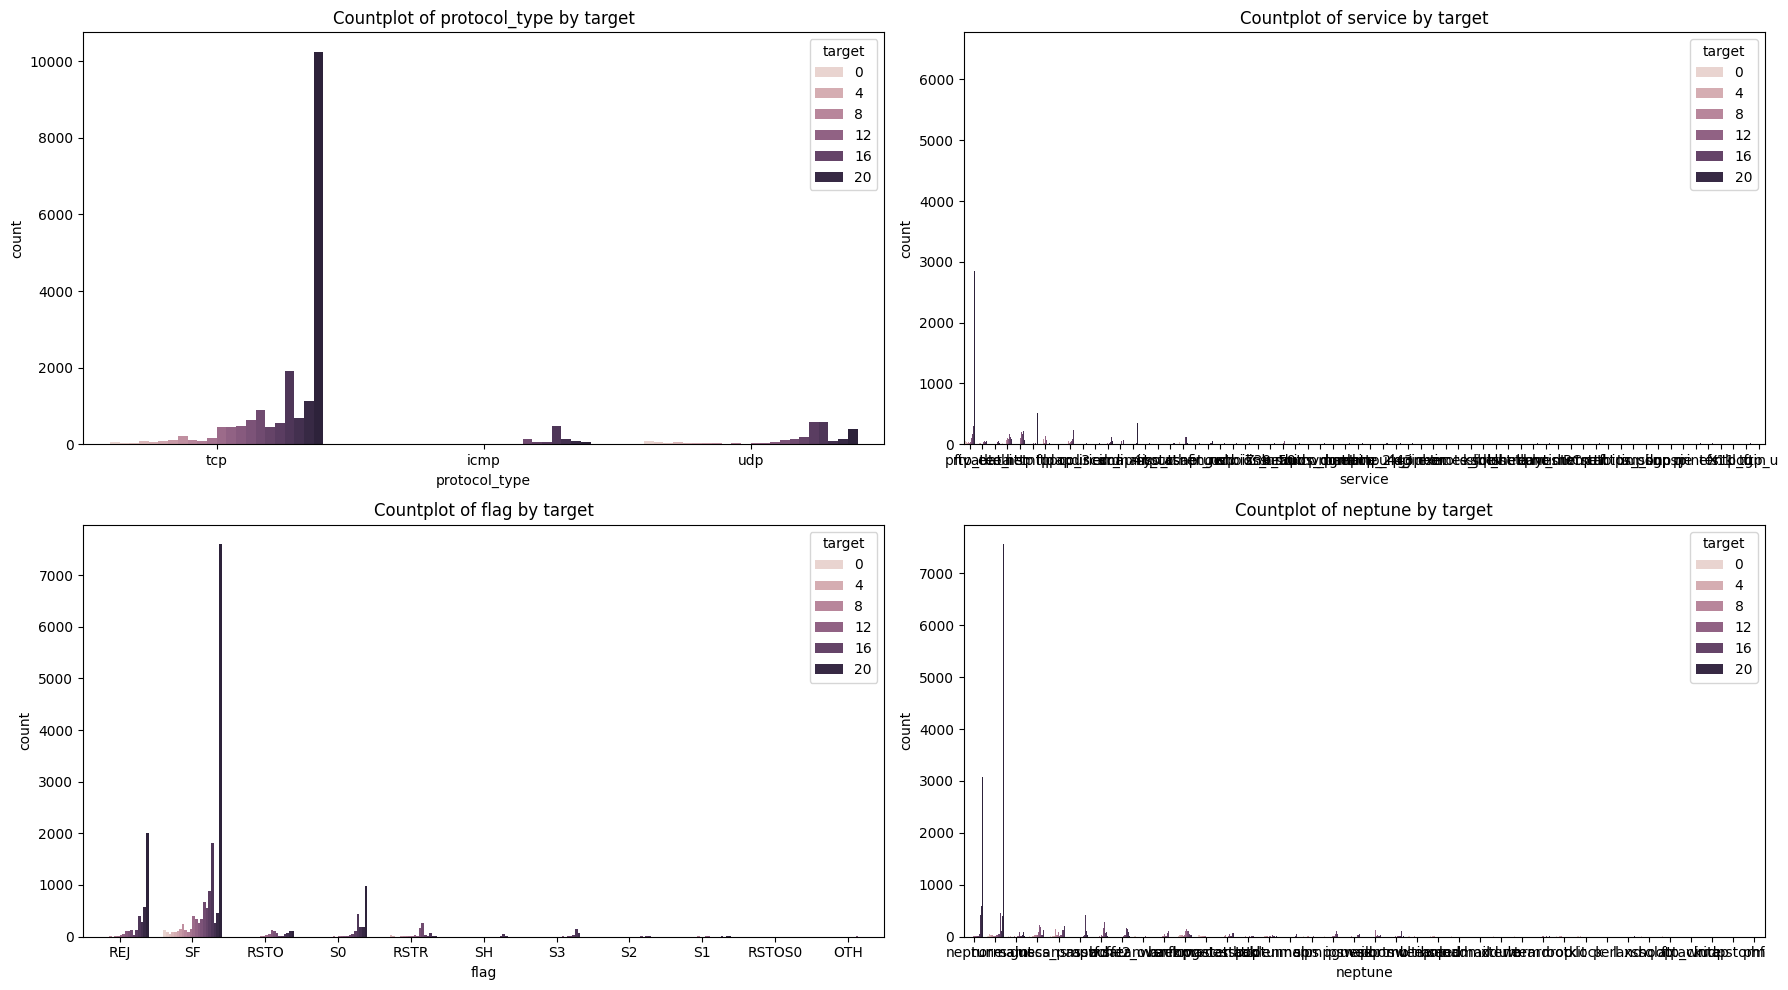

In [ ]:
# Count plot of categorical features

plt.figure(figsize=(18, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i+1)  # Use 2 rows and 2 subplots in each row
    sns.countplot(x=col, data=df, hue='target')
    plt.title(f'Countplot of {col} by target')
plt.tight_layout()
plt.show()

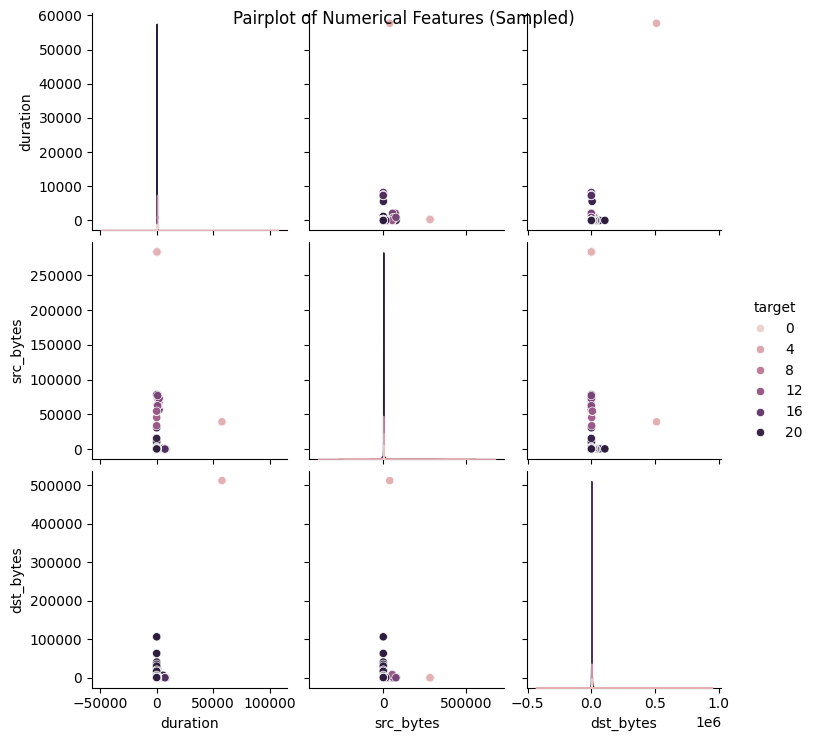

In [ ]:
# Pairplot of a few numerical features

sns.pairplot(df.sample(1000), vars=numeric_cols[:3], hue='target')
plt.suptitle('Pairplot of Numerical Features (Sampled)')
plt.show()

---

## | Feature Engineering

In [ ]:
# Create binary features for each protocol type

df2['is_protocol_tcp'] = (df2['protocol_type_tcp'] == 1).astype(int)
df2['is_protocol_udp'] = (df2['protocol_type_udp'] == 1).astype(int)
df2['is_protocol_icmp'] = (df2['protocol_type_icmp'] == 1).astype(int)

In [ ]:
# Create binary features for each flag

df2['is_flag_SF'] = (df2['flag_SF'] == 1).astype(int)
df2['is_flag_S0'] = (df2['flag_S0'] == 1).astype(int)
df2['is_flag_REJ'] = (df2['flag_REJ'] == 1).astype(int)

In [ ]:
# Aggregate services into categories

web_services = ['http', 'https', 'smtp', 'ftp', 'ssh', 'ssl']
df2['service_category'] = df['service'].apply(lambda x: 'Web' if x in web_services else 'Others')

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_model = RandomForestClassifier(random_state=42)

## | Model Building

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

In [ ]:
X = df2.drop('target', axis=1)  # Features
y = df2['target']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Perform one-hot encoding on categorical features

X_train_encoded = pd.get_dummies(X_train, columns=['service_category'])
X_test_encoded = pd.get_dummies(X_test, columns=['service_category'])

**Random Forest:**

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=42)

**Support Vector Machine:**

In [ ]:
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train_encoded, y_train)

SVC(probability=True, random_state=42)

**Logistic Regression:**

In [ ]:
log_reg_model = LogisticRegression(random_state=42, max_iter=10000)  # Increase max_iter
log_reg_model.fit(X_train_encoded, y_train)

LogisticRegression(max_iter=10000, random_state=42)

**Neural Network (Multi-layer Perceptron):**

In [ ]:
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_encoded, y_train)

MLPClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [ ]:
rf_predictions = rf_model.predict(X_test_encoded)
svm_predictions = svm_model.predict(X_test_encoded)
log_reg_predictions = log_reg_model.predict(X_test_encoded)
nn_predictions = nn_model.predict(X_test_encoded)

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
nn_accuracy = accuracy_score(y_test, nn_predictions)

In [ ]:
models = ['Random Forest', 'SVM', 'Logistic Regression', 'Neural Network']
predictions = [rf_predictions, svm_predictions, log_reg_predictions, nn_predictions]

Metrics for Random Forest:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
False Positive Rate: 0.02
ROC AUC Score: 0.98
Confusion Matrix:
[[2103   47]
 [  27 2332]]


Metrics for SVM:
Accuracy: 0.82
Precision: 0.82
Recall: 0.82
False Positive Rate: 0.17
ROC AUC Score: 0.82
Confusion Matrix:
[[1789  361]
 [ 454 1905]]


Metrics for Logistic Regression:
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
False Positive Rate: 0.04
ROC AUC Score: 0.96
Confusion Matrix:
[[2071   79]
 [  84 2275]]


Metrics for Neural Network:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
False Positive Rate: 0.03
ROC AUC Score: 0.97
Confusion Matrix:
[[2088   62]
 [  73 2286]]




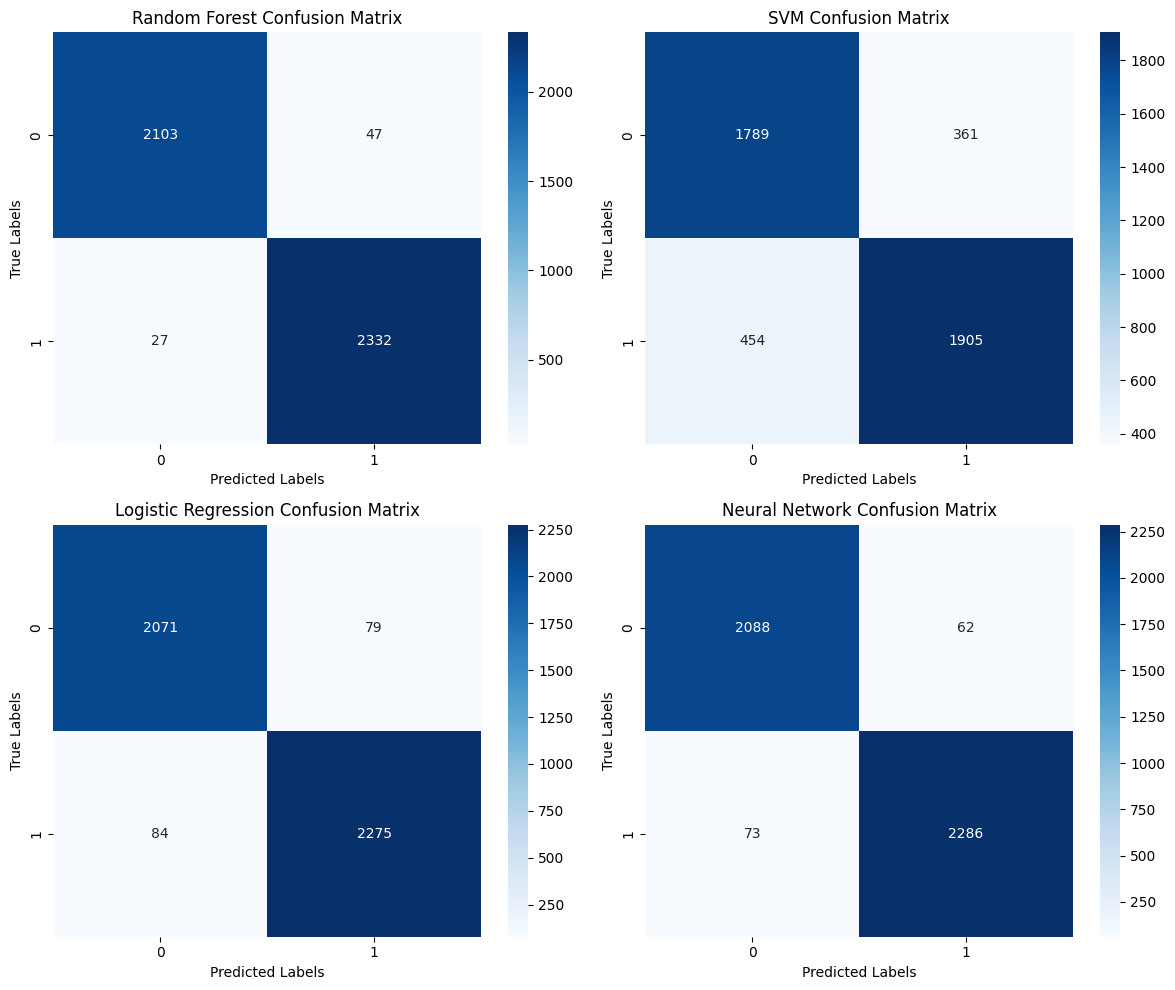

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    precision_score,
    recall_score,
    confusion_matrix,
    roc_auc_score,
    accuracy_score,
)

# Assuming you have already defined:
# rf_model, svm_model, log_reg_model, nn_model
# X_test_encoded, y_test

# Generate predictions
rf_predictions = rf_model.predict(X_test_encoded)
svm_predictions = svm_model.predict(X_test_encoded)
log_reg_predictions = log_reg_model.predict(X_test_encoded)
nn_predictions = nn_model.predict(X_test_encoded)

# Define models and their predictions
models = ['Random Forest', 'SVM', 'Logistic Regression', 'Neural Network']
predictions = [rf_predictions, svm_predictions, log_reg_predictions, nn_predictions]

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Iterate through models and their predictions
for idx, (model_name, preds) in enumerate(zip(models, predictions)):
    # Calculate metrics
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    accuracy = accuracy_score(y_test, preds)
    roc_auc = roc_auc_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)
    fp_rate = cm[0, 1] / (cm[0, 0] + cm[0, 1])

    # Print metrics
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"False Positive Rate: {fp_rate:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print("\n")

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{model_name} Confusion Matrix')
    axes[idx].set_xlabel('Predicted Labels')
    axes[idx].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

<ipython-input-43-d5f7bcc729d0>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=metrics_df, palette='viridis')


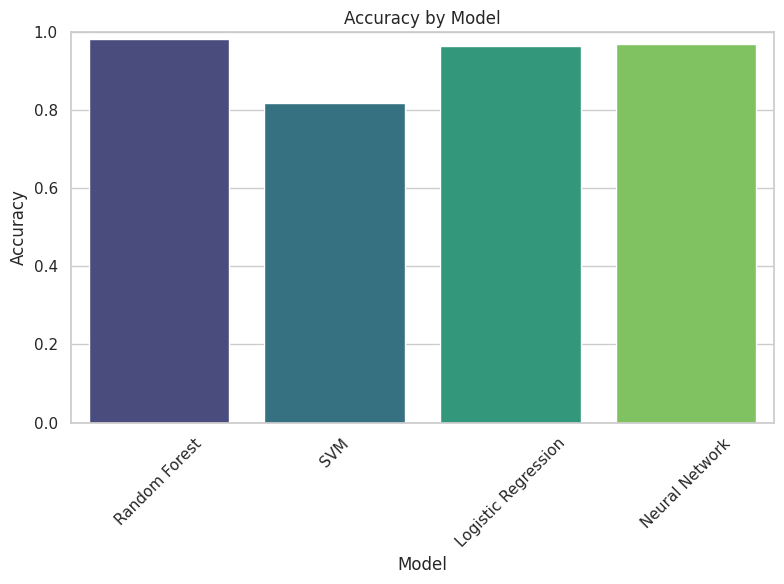

<ipython-input-43-d5f7bcc729d0>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=metrics_df, palette='viridis')


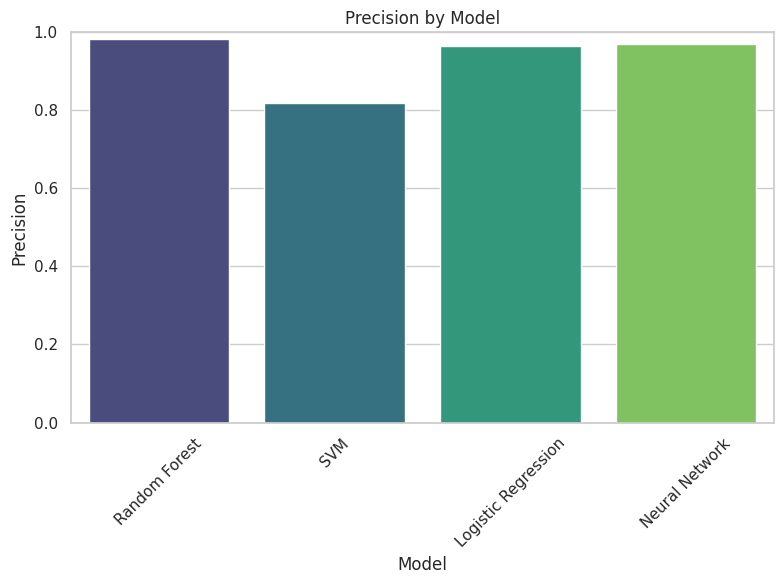

<ipython-input-43-d5f7bcc729d0>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=metrics_df, palette='viridis')


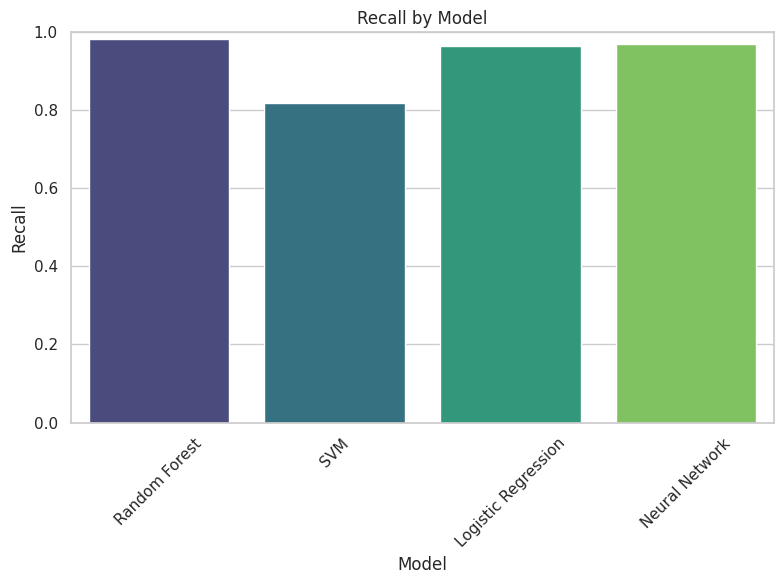

<ipython-input-43-d5f7bcc729d0>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=metrics_df, palette='viridis')


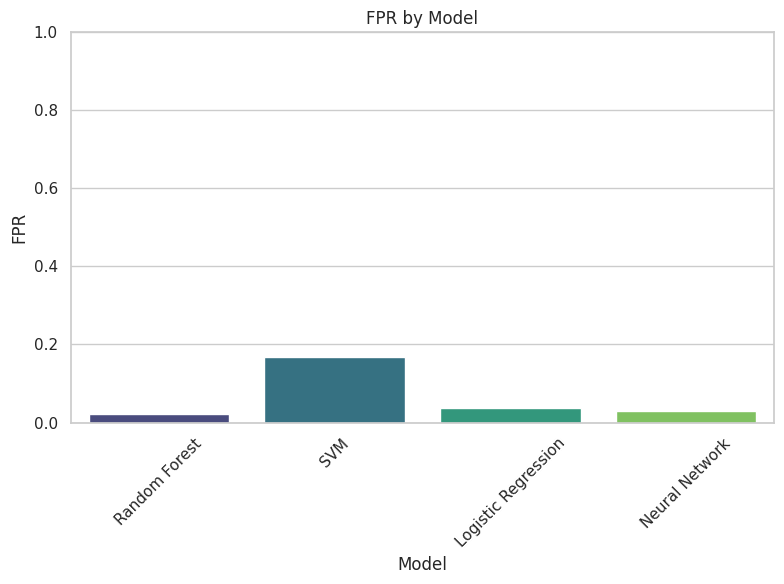

<ipython-input-43-d5f7bcc729d0>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=metrics_df, palette='viridis')


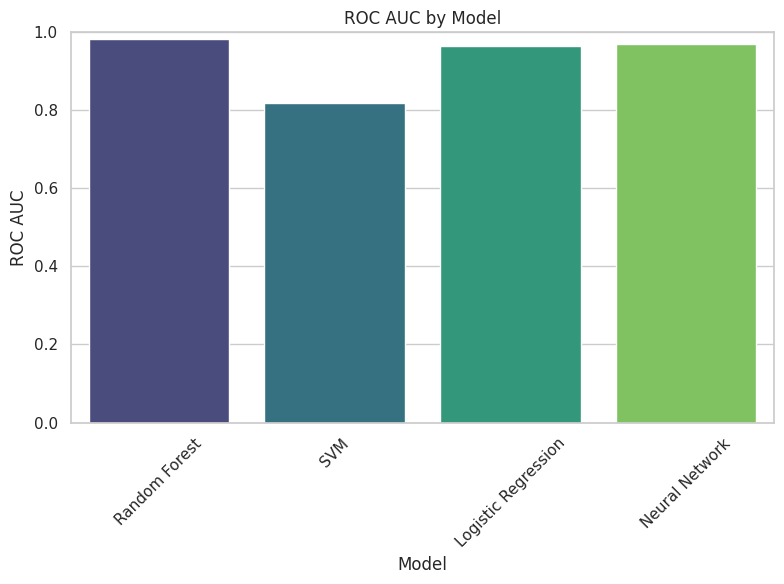

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    roc_auc_score,
)

# Assuming you have already defined:
# rf_model, svm_model, log_reg_model, nn_model
# X_test_encoded, y_test

# Generate predictions
rf_predictions = rf_model.predict(X_test_encoded)
svm_predictions = svm_model.predict(X_test_encoded)
log_reg_predictions = log_reg_model.predict(X_test_encoded)
nn_predictions = nn_model.predict(X_test_encoded)

# Define models and their predictions
models = ['Random Forest', 'SVM', 'Logistic Regression', 'Neural Network']
predictions = [rf_predictions, svm_predictions, log_reg_predictions, nn_predictions]

# Initialize a list to store metrics
metrics_list = []

# Calculate metrics for each model
for model_name, preds in zip(models, predictions):
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    cm = confusion_matrix(y_test, preds)
    fp_rate = cm[0, 1] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) != 0 else 0
    roc_auc = roc_auc_score(y_test, preds)

    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'FPR': fp_rate,
        'ROC AUC': roc_auc
    })

# Create a DataFrame from the metrics
metrics_df = pd.DataFrame(metrics_list)

# Set plot style
sns.set(style="whitegrid")

# Plot each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'FPR', 'ROC AUC']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Model', y=metric, data=metrics_df, palette='viridis')
    plt.title(f'{metric} by Model')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<ipython-input-44-744eda78c176>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=metrics_df, palette='viridis')


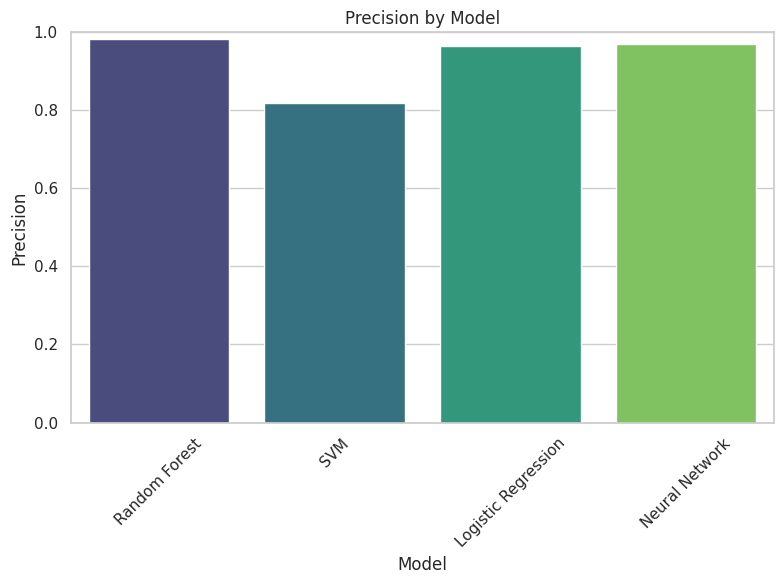

<ipython-input-44-744eda78c176>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=metrics_df, palette='viridis')


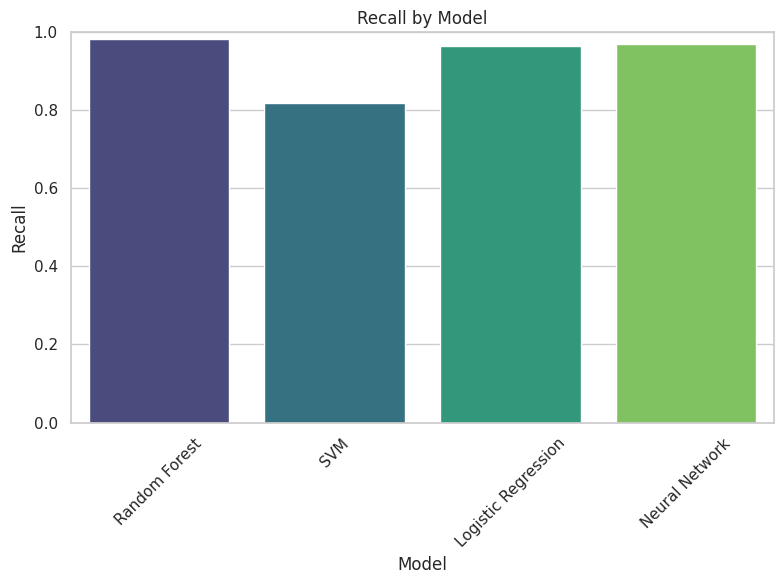

In [ ]:
# Precision plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Precision', data=metrics_df, palette='viridis')
plt.title('Precision by Model')
plt.ylabel('Precision')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Recall plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Recall', data=metrics_df, palette='viridis')
plt.title('Recall by Model')
plt.ylabel('Recall')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier

# Ensemble: Voting Classifier with Random Forest + SVM
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('svm', svm_model)],
    voting='soft'
)
ensemble_model.fit(X_train_encoded, y_train)

# Predict using ensemble
ensemble_preds = ensemble_model.predict(X_test_encoded)

# Evaluate metrics
ensemble_accuracy = accuracy_score(y_test, ensemble_preds)
ensemble_precision = precision_score(y_test, ensemble_preds, average='weighted')
ensemble_recall = recall_score(y_test, ensemble_preds, average='weighted')
ensemble_roc_auc = roc_auc_score(y_test, ensemble_preds)
ensemble_cm = confusion_matrix(y_test, ensemble_preds)
ensemble_fp_rate = ensemble_cm[0, 1] / (ensemble_cm[0, 0] + ensemble_cm[0, 1])

# Print metrics
print(" Metrics for Voting Classifier (RF + SVM):")
print(f"Accuracy: {ensemble_accuracy:.2f}")
print(f"Precision: {ensemble_precision:.2f}")
print(f"Recall: {ensemble_recall:.2f}")
print(f"False Positive Rate: {ensemble_fp_rate:.2f}")
print(f"ROC AUC Score: {ensemble_roc_auc:.2f}")
print("Confusion Matrix:")
print(ensemble_cm)

new_row = pd.DataFrame([{
    'Model': 'Voting (RF + SVM)',
    'Accuracy': ensemble_accuracy,
    'Precision': ensemble_precision,
    'Recall': ensemble_recall,
    'FPR': ensemble_fp_rate,
    'ROC AUC': ensemble_roc_auc
}])

metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)


 Metrics for Voting Classifier (RF + SVM):
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
False Positive Rate: 0.03
ROC AUC Score: 0.97
Confusion Matrix:
[[2086   64]
 [  72 2287]]


<ipython-input-46-d52441fda752>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='coolwarm')
<ipython-input-46-d52441fda752>:17: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


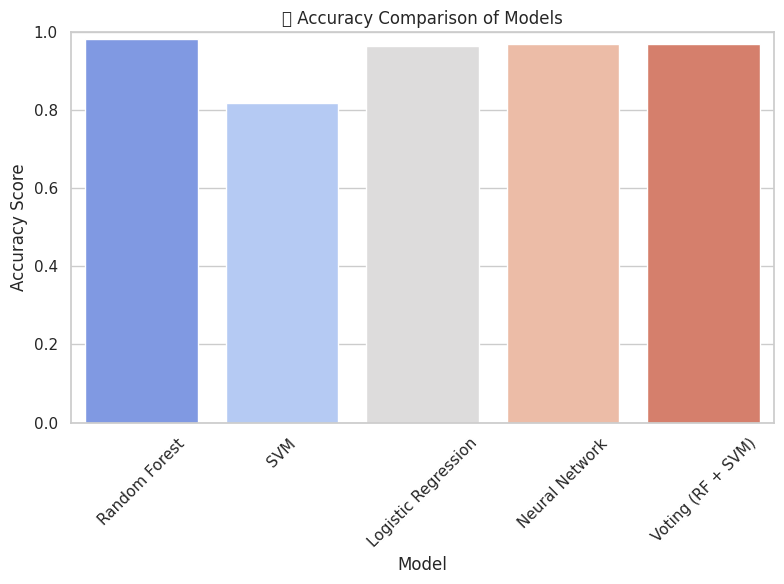

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Plot Accuracy comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='coolwarm')

# Customize the plot
plt.title('🔍 Accuracy Comparison of Models')
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-47-744eda78c176>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=metrics_df, palette='viridis')


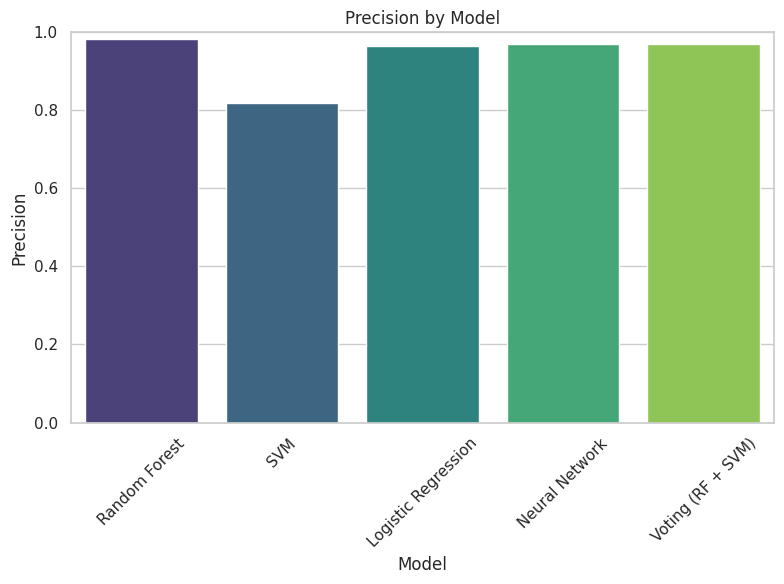

<ipython-input-47-744eda78c176>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=metrics_df, palette='viridis')


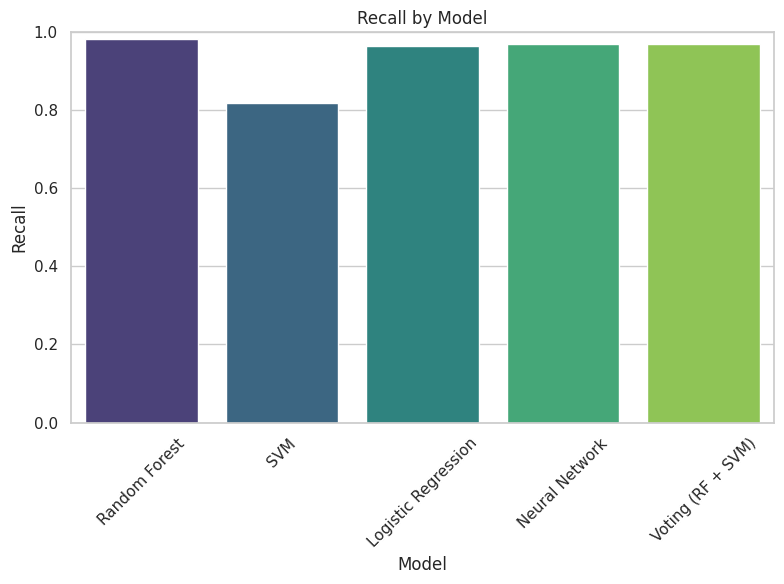

In [ ]:
# Precision plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Precision', data=metrics_df, palette='viridis')
plt.title('Precision by Model')
plt.ylabel('Precision')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Recall plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Recall', data=metrics_df, palette='viridis')
plt.title('Recall by Model')
plt.ylabel('Recall')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


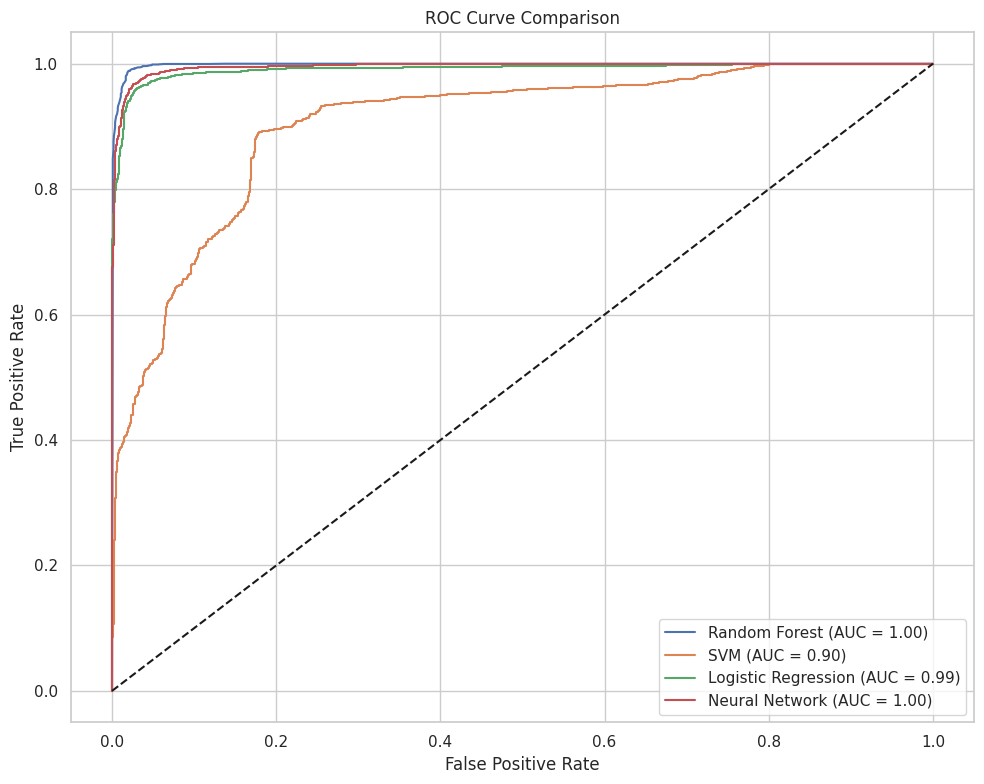

In [ ]:
# Get predicted probabilities or decision scores
rf_probs = rf_model.predict_proba(X_test_encoded)[:, 1]
svm_probs = svm_model.decision_function(X_test_encoded)
log_reg_probs = log_reg_model.predict_proba(X_test_encoded)[:, 1]
nn_probs = nn_model.predict_proba(X_test_encoded)[:, 1]
from sklearn.metrics import roc_curve, auc

# Store models, names, and predicted probabilities
model_names = ['Random Forest', 'SVM', 'Logistic Regression', 'Neural Network']
probs = [rf_probs, svm_probs, log_reg_probs, nn_probs]

plt.figure(figsize=(10, 8))

for name, y_prob in zip(model_names, probs):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Get predicted probabilities
rf_probs = rf_model.predict_proba(X_test_encoded)[:, 1]
svm_probs = svm_model.predict_proba(X_test_encoded)[:, 1]
log_reg_probs = log_reg_model.predict_proba(X_test_encoded)[:, 1]
nn_probs = nn_model.predict_proba(X_test_encoded)[:, 1]
ensemble_probs = ensemble_model.predict_proba(X_test_encoded)[:, 1]


<ipython-input-50-9c94d17108b7>:23: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


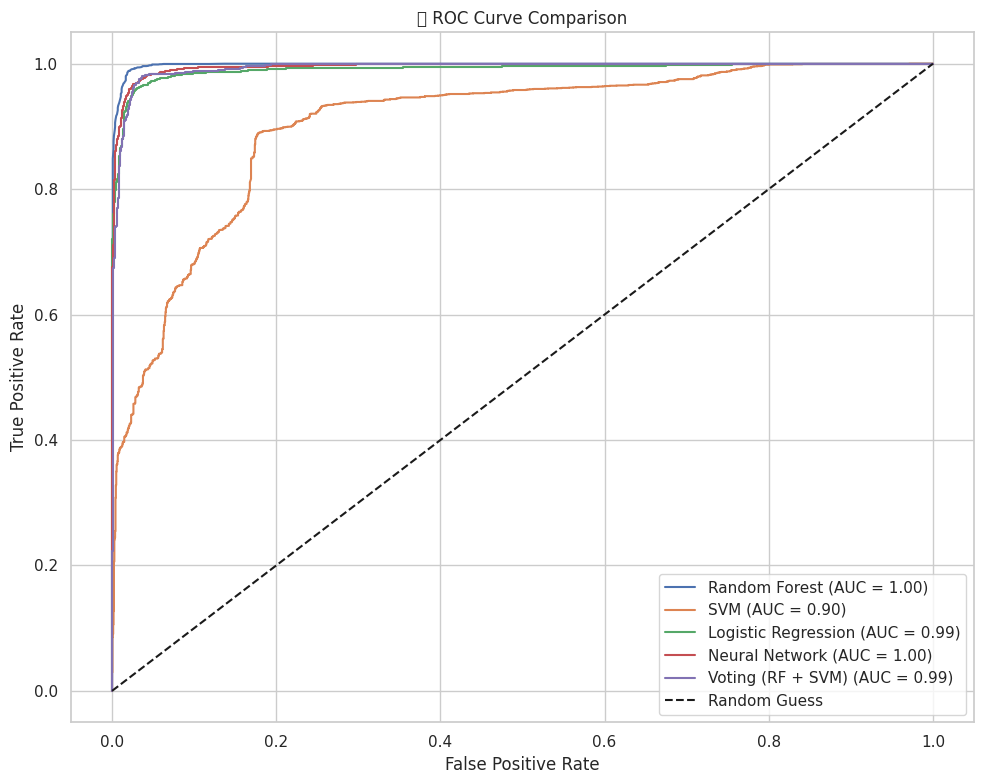

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Names and corresponding probabilities
model_names = ['Random Forest', 'SVM', 'Logistic Regression', 'Neural Network', 'Voting (RF + SVM)']
probabilities = [rf_probs, svm_probs, log_reg_probs, nn_probs, ensemble_probs]

plt.figure(figsize=(10, 8))

for name, probs in zip(model_names, probabilities):
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.title('📈 ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Tiny Model Performance Metrics:
----------------------------------------
  Tiny RF
   Accuracy       : 0.93
   Precision      : 0.93
   Recall         : 0.93
   FPR            : 0.08
   ROC AUC        : 0.93
   Confusion Matrix:
[[1982  168]
 [ 157 2202]]
----------------------------------------
  Tiny SVM
   Accuracy       : 0.96
   Precision      : 0.96
   Recall         : 0.96
   FPR            : 0.05
   ROC AUC        : 0.96
   Confusion Matrix:
[[2050  100]
 [  80 2279]]
----------------------------------------
  Tiny Logistic
   Accuracy       : 0.96
   Precision      : 0.96
   Recall         : 0.96
   FPR            : 0.04
   ROC AUC        : 0.96
   Confusion Matrix:
[[2065   85]
 [  83 2276]]
----------------------------------------
  Tiny NN
   Accuracy       : 0.97
   Precision      : 0.97
   Recall         : 0.97
   FPR            : 0.03
   ROC AUC        : 0.97
   Confusion Matrix:
[[2096   54]
 [ 103 2256]]
----------------------------------------
  Voting (RF + SVM)
   

<ipython-input-51-112507cec5a6>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=metrics_df, palette='Set2')


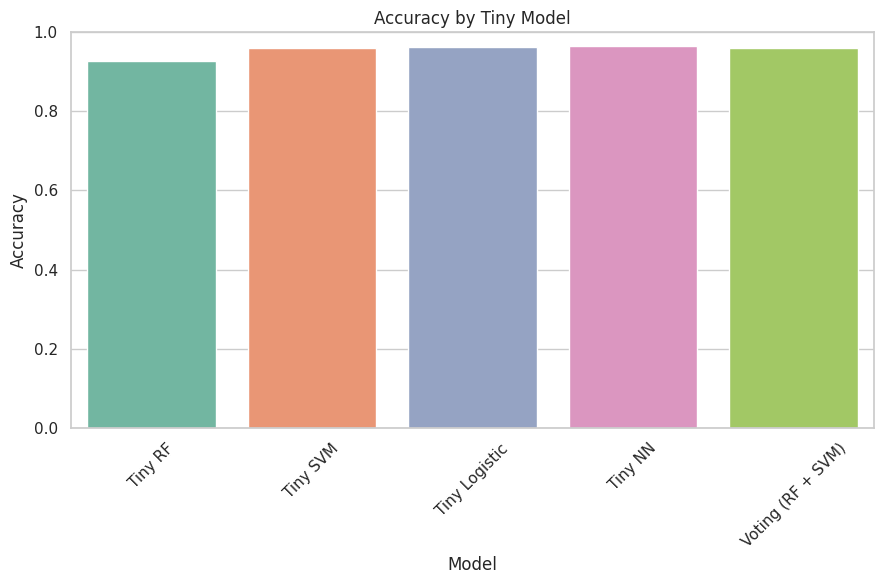

<ipython-input-51-112507cec5a6>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=metrics_df, palette='Set2')


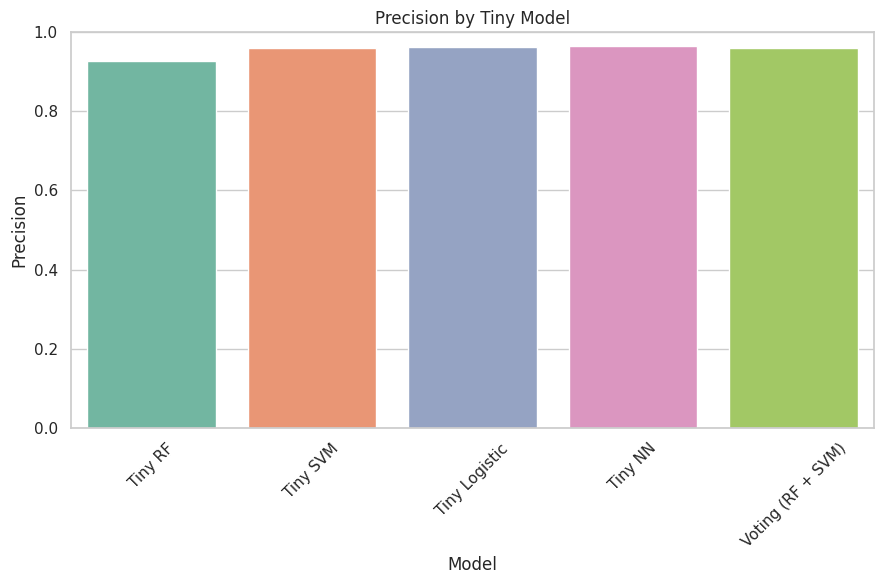

<ipython-input-51-112507cec5a6>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=metrics_df, palette='Set2')


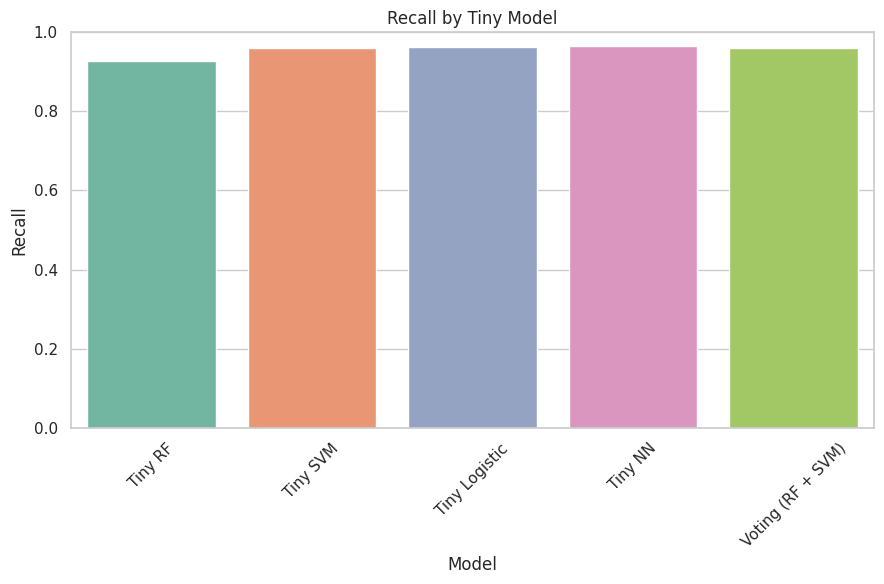

<ipython-input-51-112507cec5a6>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=metrics_df, palette='Set2')


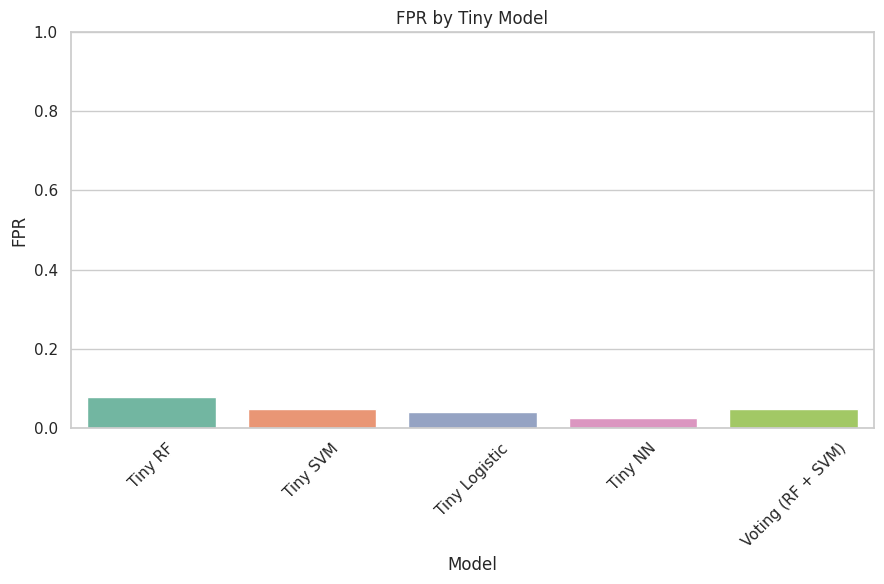

<ipython-input-51-112507cec5a6>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=metrics_df, palette='Set2')


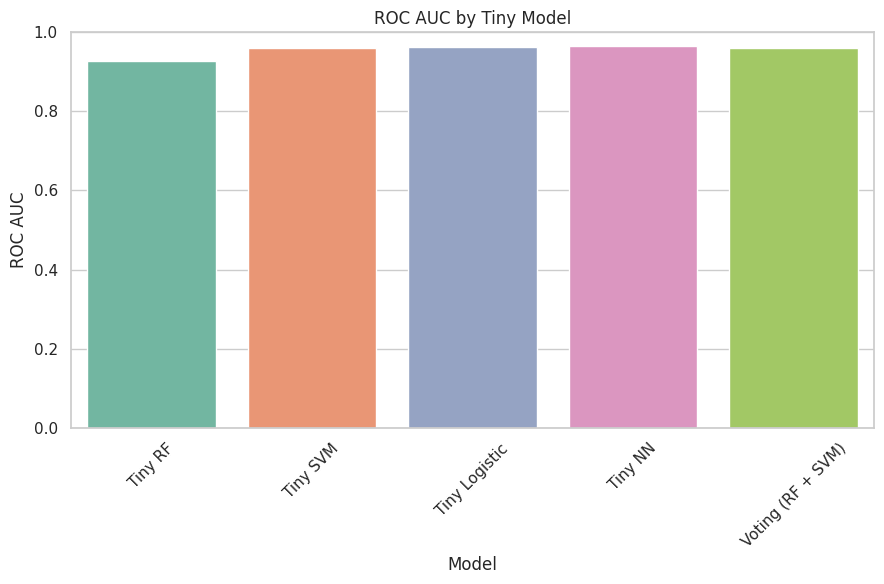

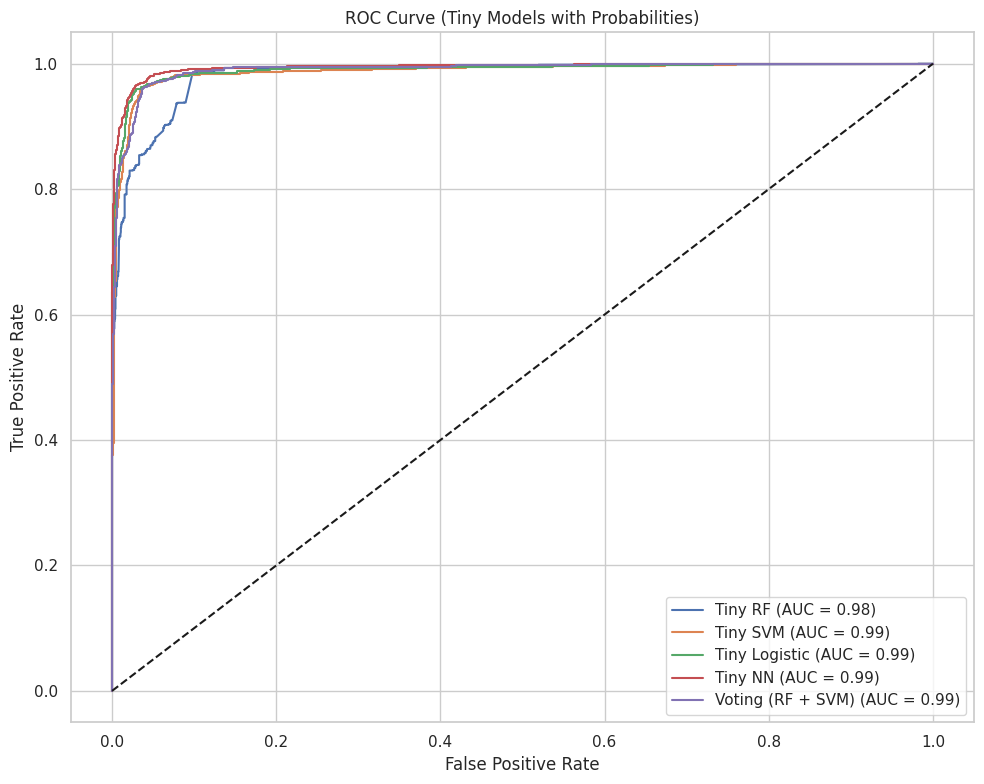

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC  # changed from LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, roc_auc_score, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Train Tiny Models
tiny_rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
tiny_rf.fit(X_train_encoded, y_train)

tiny_svm = SVC(kernel='linear', C=0.1, probability=True, random_state=42)  # updated here
tiny_svm.fit(X_train_encoded, y_train)

tiny_log_reg = LogisticRegression(C=0.5, max_iter=500, random_state=42)
tiny_log_reg.fit(X_train_encoded, y_train)

tiny_nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, random_state=42)
tiny_nn.fit(X_train_encoded, y_train)

# 2. Voting Classifier (RF + SVM only, updated to soft voting)
tiny_ensemble_rf_svm = VotingClassifier(
    estimators=[
        ('rf', tiny_rf),
        ('svm', tiny_svm)
    ],
    voting='soft'
)
tiny_ensemble_rf_svm.fit(X_train_encoded, y_train)

# 3. Evaluate All Models
models = {
    'Tiny RF': tiny_rf,
    'Tiny SVM': tiny_svm,
    'Tiny Logistic': tiny_log_reg,
    'Tiny NN': tiny_nn,
    'Voting (RF + SVM)': tiny_ensemble_rf_svm
}

metrics_list = []

print(" Tiny Model Performance Metrics:\n" + "-" * 40)
for name, model in models.items():
    preds = model.predict(X_test_encoded)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    cm = confusion_matrix(y_test, preds)
    fp_rate = cm[0, 1] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) != 0 else 0
    roc_auc = roc_auc_score(y_test, preds)

    metrics_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'FPR': fp_rate,
        'ROC AUC': roc_auc
    })

    # Print nicely
    print(f"  {name}")
    print(f"   Accuracy       : {accuracy:.2f}")
    print(f"   Precision      : {precision:.2f}")
    print(f"   Recall         : {recall:.2f}")
    print(f"   FPR            : {fp_rate:.2f}")
    print(f"   ROC AUC        : {roc_auc:.2f}")
    print(f"   Confusion Matrix:\n{cm}")
    print("-" * 40)

# 4. DataFrame for Plotting
metrics_df = pd.DataFrame(metrics_list)

# 5. Bar Plots for Each Metric
sns.set(style="whitegrid")
for metric in ['Accuracy', 'Precision', 'Recall', 'FPR', 'ROC AUC']:
    plt.figure(figsize=(9, 6))
    sns.barplot(x='Model', y=metric, data=metrics_df, palette='Set2')
    plt.title(f'{metric} by Tiny Model')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 6. ROC Curve (now fully supported by all listed models)
model_probs = {
    'Tiny RF': tiny_rf.predict_proba(X_test_encoded)[:, 1],
    'Tiny SVM': tiny_svm.predict_proba(X_test_encoded)[:, 1],
    'Tiny Logistic': tiny_log_reg.predict_proba(X_test_encoded)[:, 1],
    'Tiny NN': tiny_nn.predict_proba(X_test_encoded)[:, 1],
    'Voting (RF + SVM)': tiny_ensemble_rf_svm.predict_proba(X_test_encoded)[:, 1]
}

plt.figure(figsize=(10, 8))
for name, probs in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (Tiny Models with Probabilities)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
